<a href="https://colab.research.google.com/github/matheusgneves/data-science-projects/blob/main/Classifica%C3%A7%C3%A3o_selecionando_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# Bibliotecas utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/allanspadini/dados-com-muitas-dimensoes/main/dados/hotel.csv')

In [3]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34141,2,0,1,2,0,305,2018,11,4,0,...,0,0,0,0,0,0,0,1,0,1
34142,2,0,0,3,0,67,2018,9,28,0,...,0,0,0,0,0,0,0,0,1,1
34143,1,0,0,2,0,193,2018,6,20,0,...,0,0,0,0,0,0,0,0,1,1
34144,2,0,2,1,0,85,2017,7,5,0,...,0,0,0,0,0,0,0,0,1,1


In [4]:
df.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
required_car_parking_space,0
lead_time,0
arrival_year,0
arrival_month,0
arrival_date,0
repeated_guest,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  int64  
 1   no_of_children                        34146 non-null  int64  
 2   no_of_weekend_nights                  34146 non-null  int64  
 3   no_of_week_nights                     34146 non-null  int64  
 4   required_car_parking_space            34146 non-null  int64  
 5   lead_time                             34146 non-null  int64  
 6   arrival_year                          34146 non-null  int64  
 7   arrival_month                         34146 non-null  int64  
 8   arrival_date                          34146 non-null  int64  
 9   repeated_guest                        34146 non-null  int64  
 10  no_of_previous_cancellations          34146 non-null  int64  
 11  no_of_previous_

In [6]:
X = df.drop(['booking_status'], axis=1)

In [7]:
y = df['booking_status']

In [8]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=50,
                                                        stratify=y)

In [9]:
modelo = RandomForestClassifier(random_state=2)

In [10]:
modelo.fit(X_treino, y_treino)

RandomForestClassifier(random_state=2)

In [11]:
modelo.score(X_teste, y_teste)

0.920636470128856

In [12]:
df['booking_status'].value_counts()

,count
booking_status,
0,17073
1,17073


<Axes: xlabel='booking_status', ylabel='arrival_month'>

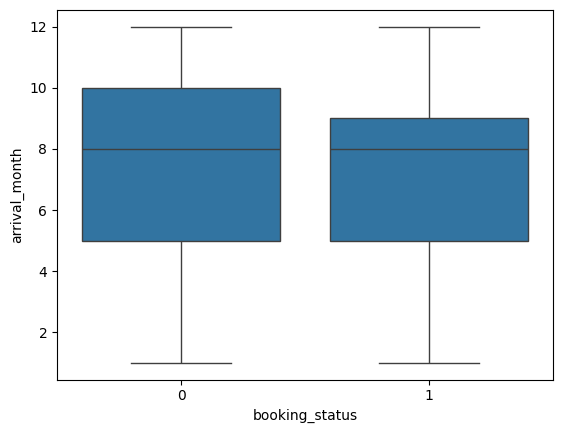

In [13]:
 sns.boxplot(X_treino, x=y_treino, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='arrival_month'>

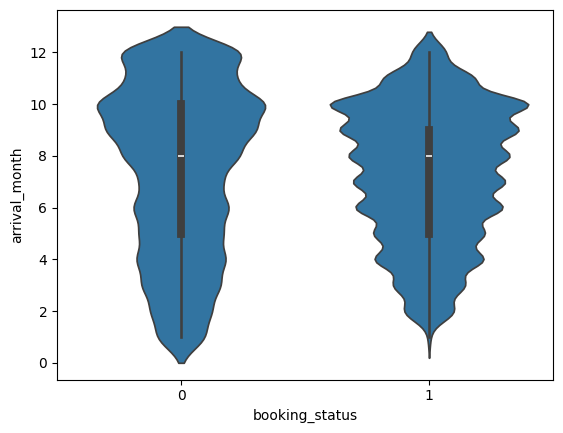

In [14]:
sns.violinplot(X_treino, x=y_treino, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='lead_time'>

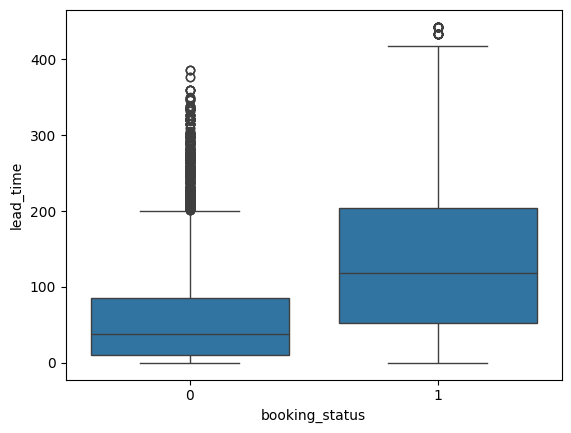

In [15]:
sns.boxplot(X_treino, x=y_treino, y='lead_time')

In [16]:
correlacao = pd.concat([X_treino, y_treino], axis=1).corr()

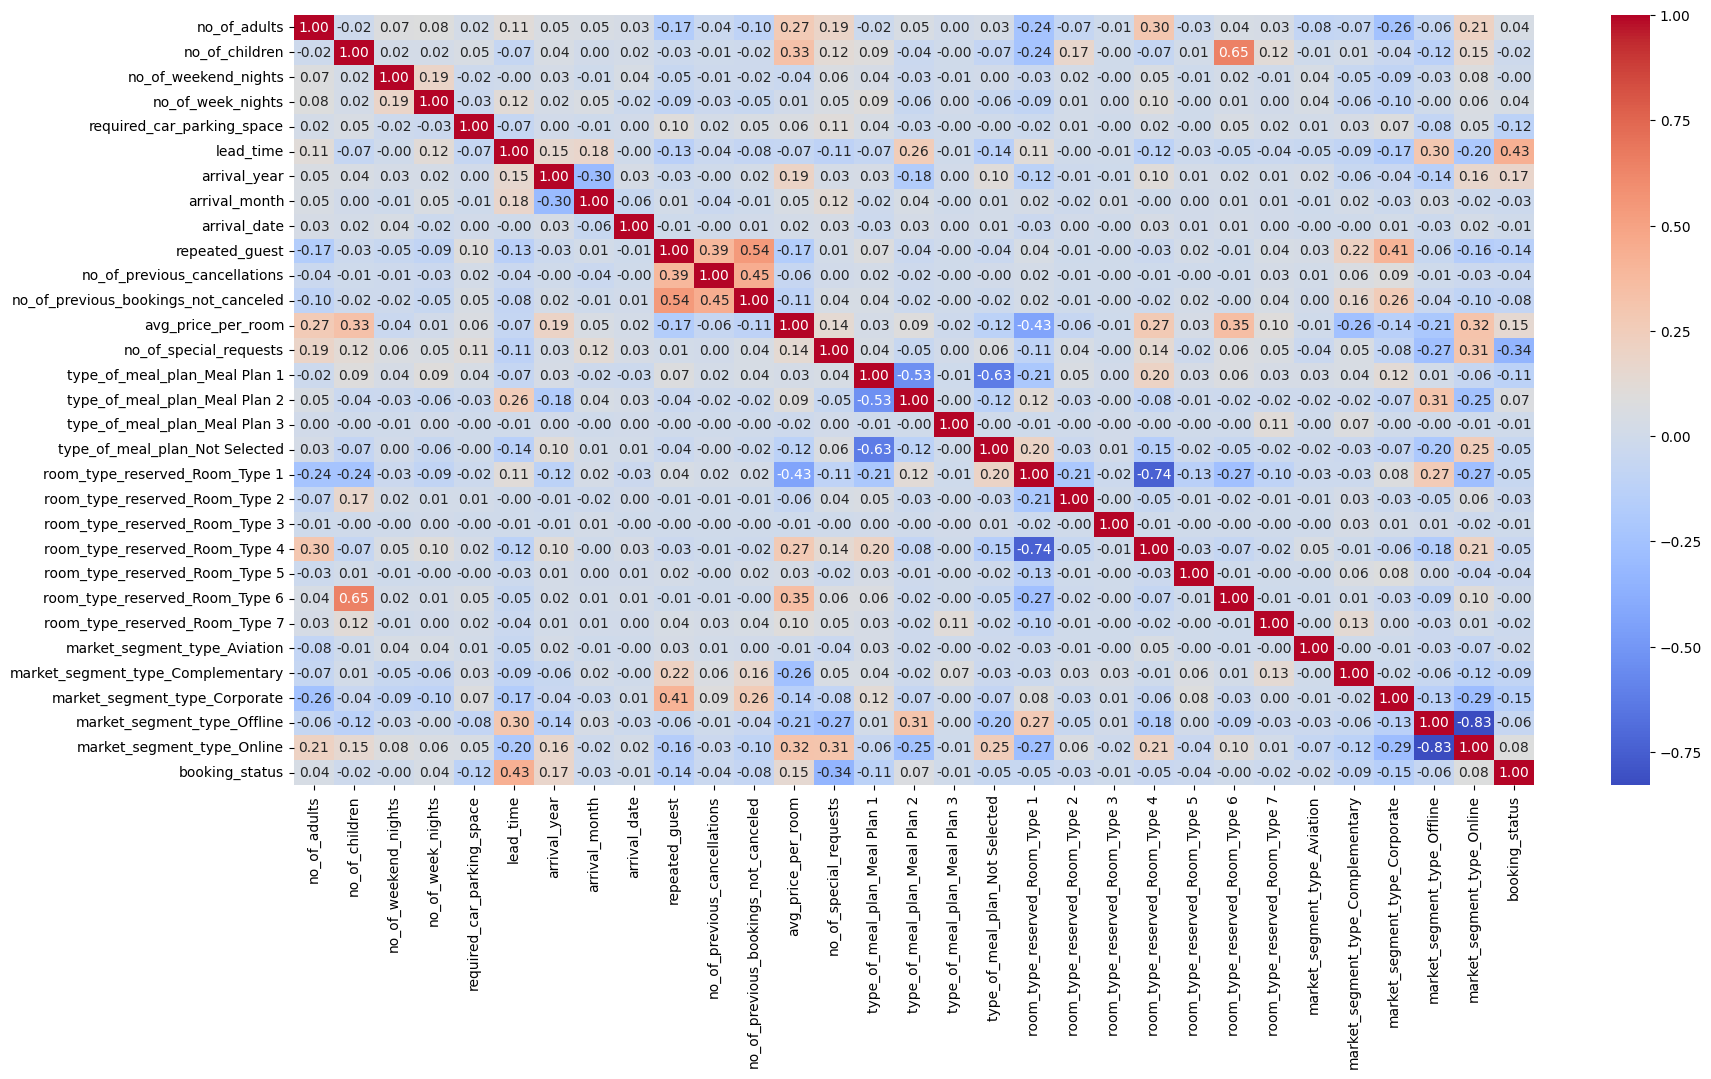

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [18]:
modelo = RandomForestClassifier(random_state=2)

In [19]:
modelo.fit(X_treino, y_treino)

RandomForestClassifier(random_state=2)

In [20]:
importancia = pd.DataFrame({'colunas': X_treino.columns,
                            'importancia': modelo.feature_importances_})

importancia

,colunas,importancia
0,no_of_adults,0.022453
1,no_of_children,0.005742
2,no_of_weekend_nights,0.031755
3,no_of_week_nights,0.047354
4,required_car_parking_space,0.008567
5,lead_time,0.283828
6,arrival_year,0.023609
7,arrival_month,0.085598
8,arrival_date,0.082394
9,repeated_guest,0.004197


In [21]:
importancia_10 = importancia.sort_values(by='importancia', ascending=False).head(10)

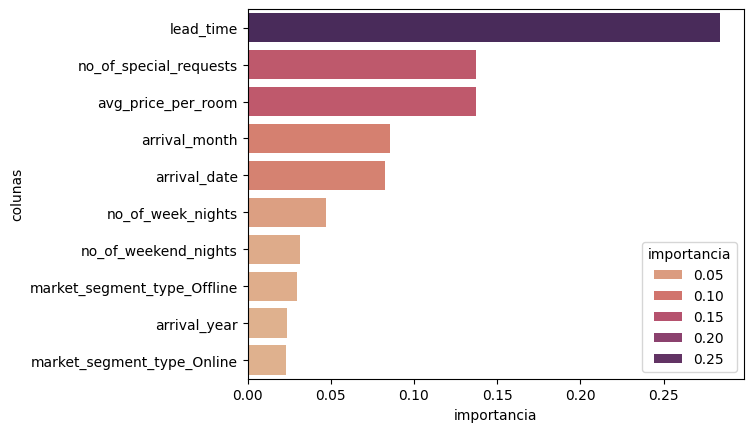

In [22]:
sns.barplot(x='importancia', y='colunas', data=importancia_10, hue='importancia', palette='flare')

plt.show()

In [23]:
modelo_fselecionadas = SelectFromModel(modelo, max_features=10, prefit=True)

In [24]:
X_treino_selecionadas = modelo_fselecionadas.transform(X_treino)
X_teste_selecionadas = modelo_fselecionadas.transform(X_teste)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [25]:
modelo = RandomForestClassifier(random_state=2)

In [26]:
modelo.fit(X_treino_selecionadas, y_treino)

RandomForestClassifier(random_state=2)

In [27]:
modelo.score(X_teste_selecionadas, y_teste)

0.8976962124170246

In [28]:
modelo = RandomForestClassifier(random_state=2)

In [29]:
parametros_busca = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [30]:
grid_search = GridSearchCV(estimator=modelo, param_grid=parametros_busca,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [31]:
grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [32]:
grid_search.cv_results_

{'mean_fit_time': array([ 3.56746931,  7.31000776, 10.72452254,  3.59964218,  6.98205833,
        10.26566086,  3.35802832,  6.16036205,  9.56427002,  3.06865373,
         6.33031297,  9.82573857,  2.12133617,  4.24556403,  6.17283745,
         1.84737453,  4.20530124,  6.1745553 ,  2.23554649,  3.97015634,
         6.24820833,  1.86308513,  4.17300181,  6.06404176,  3.45282221,
         6.84769526,  9.72999711,  3.31998186,  6.17287126,  9.48989549,
         2.69168901,  6.18101525,  8.83175397,  3.17255325,  5.88968349,
         9.24072933]),
 'std_fit_time': array([0.53361294, 0.64784329, 0.36994783, 0.64723249, 0.85270557,
        0.54654555, 0.61080103, 0.62827638, 0.61026117, 0.47652633,
        0.62138455, 0.84657299, 0.35489612, 0.64183971, 0.6414721 ,
        0.01459043, 0.65669845, 0.5039302 , 0.45842221, 0.60124448,
        0.65209044, 0.04482685, 0.25812855, 0.66120977, 0.49733735,
        0.52527049, 0.50761791, 0.51805152, 0.68463725, 0.49028936,
        0.00734987, 0.679

In [34]:
modelo_fselecionadas  = SelectFromModel(grid_search.best_estimator_, max_features=10, prefit=True)

In [35]:
X_treino_selecionadas = modelo_fselecionadas.transform(X_treino)
X_teste_selecionadas = modelo_fselecionadas.transform(X_teste)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [36]:
modelo = grid_search.best_estimator_

In [37]:
modelo.fit(X_treino_selecionadas, y_treino)

RandomForestClassifier(n_estimators=300, random_state=2)

In [38]:
modelo.score(X_teste_selecionadas, y_teste)

0.8973057399453338

In [41]:
y_pred = modelo.predict(X_teste_selecionadas)

In [42]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

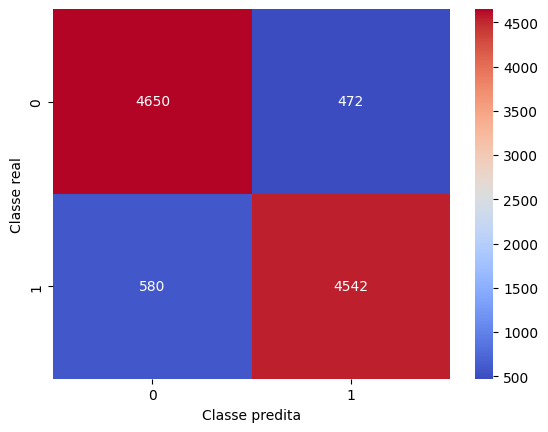

In [46]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Classe predita')
plt.ylabel('Classe real')

plt.show()

In [48]:
 fpr, tpr, threshold = roc_curve(y_teste, y_pred)

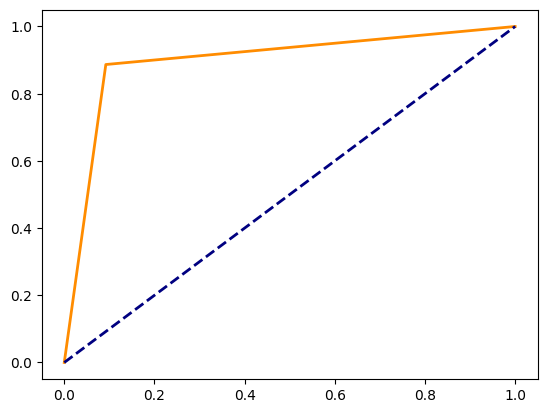

In [50]:
plt.plot(fpr, tpr, label='ROC curve', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

In [53]:
roc_auc = auc(fpr, tpr)

roc_auc

np.float64(0.8973057399453339)

In [55]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [56]:
parametros = {'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300,
  'random_state': 2}

In [57]:
modelo = RandomForestClassifier(**parametros)

In [58]:
selecionador = RFE(modelo, n_features_to_select=10, step=1)

In [60]:
selecionador.fit(X_treino, y_treino)

RFE(estimator=RandomForestClassifier(n_estimators=300, random_state=2),
    n_features_to_select=10)

In [61]:
X_treino_selecionadas = selecionador.transform(X_treino)
X_teste_selecionadas = selecionador.transform(X_teste)

In [62]:
modelo.fit(X_treino_selecionadas, y_treino)

RandomForestClassifier(n_estimators=300, random_state=2)

In [63]:
modelo.score(X_teste_selecionadas, y_teste)

0.9126317844591956

In [64]:
y_pred = modelo.predict(X_teste_selecionadas)

In [65]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

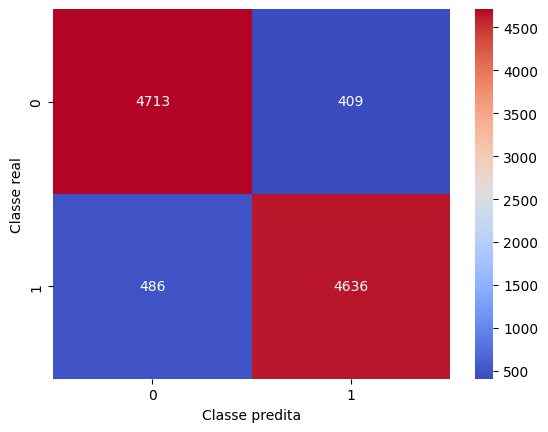

In [66]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Classe predita')
plt.ylabel('Classe real')

plt.show()

In [67]:
modelo = RandomForestClassifier(**parametros)

In [70]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=500)

In [71]:
rfecv = RFECV(estimator=modelo,
              step=1,
              cv=cv,
              scoring='roc_auc',
              min_features_to_select=1,
              importance_getter='auto')

In [72]:
rfecv.fit(X_treino, y_treino)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=500, shuffle=True),
      estimator=RandomForestClassifier(n_estimators=300, random_state=2),
      scoring='roc_auc')

In [73]:
print(f'O número ideal de features é: {rfecv.n_features_}')

O número ideal de features é: 25


In [74]:
print('O ranking das features é: \n')
print(rfecv.ranking_)

O ranking das features é: 

[1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 6 1 1 1 5 1 1 1 4 2 1 1 1 1]


In [76]:
print('O score das features é: \n')
print(rfecv.cv_results_)

O score das features é: 

{'mean_test_score': array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734]), 'std_test_score': array([0.02230485, 0.00513526, 0.00256538, 0.00215576, 0.00235998,
       0.00214142, 0.00143015, 0.00134581, 0.0012676 , 0.00140743,
       0.001545  , 0.00160935, 0.00118657, 0.00139523, 0.00150719,
       0.00162719, 0.00170077, 0.00154041, 0.00171934, 0.00164235,
       0.00144254, 0.00143644, 0.00120112, 0.00121457, 0.00127118,
       0.00121897, 0.00149984, 0.00099933, 0.00123228, 0.00116114]), 'split0_test_score': array([0.77913523, 0.88305492, 0.90862325, 0.94651964, 0.95776255,
       0.95994017, 0.96338291, 0.9632610

In [77]:
y_pred = rfecv.predict(X_teste)

In [78]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

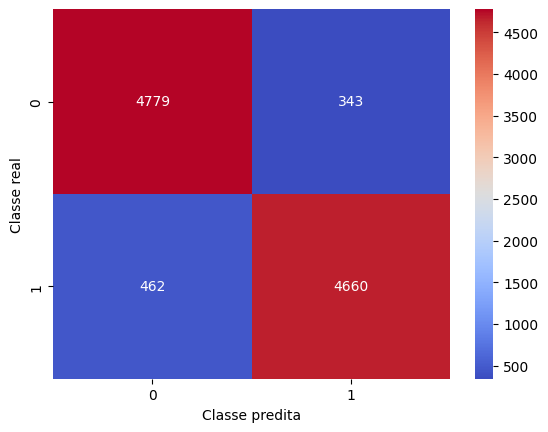

In [79]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Classe predita')
plt.ylabel('Classe real')

plt.show()

In [80]:
resultado = rfecv.cv_results_

In [81]:
resultado['mean_test_score']

array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734])

In [82]:
results_df = pd.DataFrame({'Valores': resultado['mean_test_score']})

/tmp/ipython-input-3450650294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='Valores', data=results_df, palette='flare')


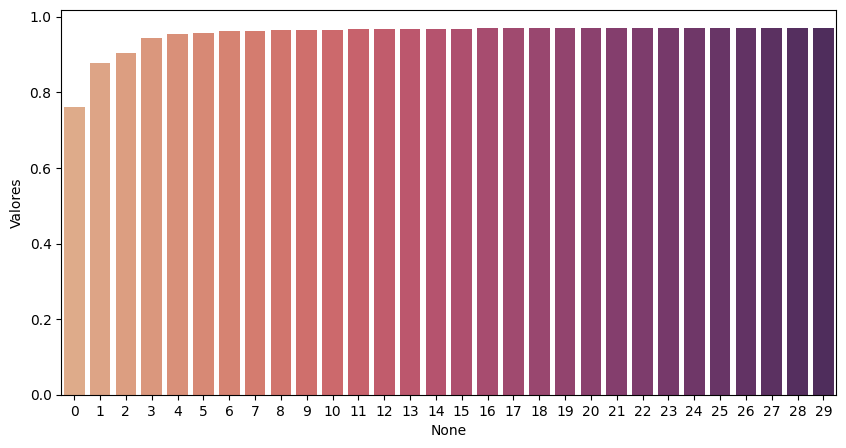

In [89]:
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y='Valores', data=results_df, palette='flare')
plt.show()